# plot maps of export production change

In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import cmocean
import plot_tools
import proc_cesm_le

plot_grid_vars = ['TLAT','TLONG','KMT','TAREA','ULAT','ULONG','UAREA',
                  'z_t','z_t_150m','z_w','dz',
                  'area_sum','vol_sum','year','lat_t','lat_t_edges']

### read the CESM-LE data

In [2]:
%%time
varlist = ['POC_100m']
op = 'ann_dft'
tr85a = {}
for v in varlist:
    file_in = os.path.join(diro['work'],'tr85.avg.%s.%s.1920-2100.nc'%(op,v))
    print('reading %s'%file_in)
    ds = xr.open_dataset(file_in,decode_times=False,decode_coords=False)
    tr85a = xr.merge((tr85a,ds))
tr85a = tr85a.drop([k for k in tr85a if k not in plot_grid_vars and k not in varlist])

print tr85a

reading /glade/scratch/mclong/calcs/iucn-ch/work/tr85.avg.ann_dft.POC_100m.1920-2100.nc
<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, time: 181, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon, time
Data variables:
    POC_100m  (time, nlat, nlon) float32 nan nan nan nan nan nan nan nan nan ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, 

### compute baseline mean

In [3]:
%%time
baselinea = tr85a.isel(time=slice(0,20)).mean(dim='time')
print baselinea

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    POC_100m  (nlat, nlon) float32 nan nan nan nan nan nan nan nan nan nan ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, nlon) float64 321.1 322.3 

### compute difference at 2100

In [4]:
delta = tr85a.isel(time=-1) - baselinea
delta = delta.drop([k for k in plot_grid_vars if k in delta])
for v in plot_grid_vars:
    if v in tr85a:
        delta[v] = tr85a[v]
print delta

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    POC_100m  (nlat, nlon) float32 nan nan nan nan nan nan nan nan nan nan ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 326.8 327.9 ...
    UAREA     (nlat, nlon) float64 1.423e+13 

In [5]:
%%time
tr85a = tr85a.compute()
delta = delta.compute()
baselinea = baselinea.compute()

CPU times: user 30 ms, sys: 62 ms, total: 92 ms
Wall time: 154 ms


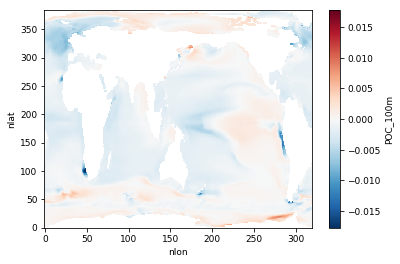

In [7]:
delta.POC_100m.plot()

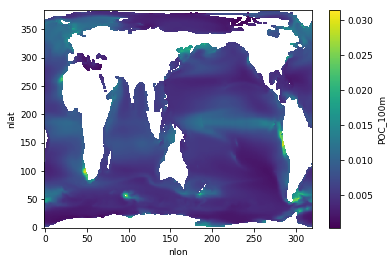

In [15]:
baselinea.POC_100m.plot()

### plot mean O2 and change

In [14]:
LON = [[]]*2
LAT = [[]]*2
Z = [[]]*2

lon = tr85a.TLONG.values
lat = tr85a.TLAT.values
field = baselinea.POC_100m.values * 1e4 * 86400. * 365. * 1e-9
LON[0],LAT[0],Z[0]= plot_tools.adjust_pop_grid(lon,lat,field)

lon = tr85a.TLONG.values
lat = tr85a.TLAT.values
field = delta.POC_100m.values * 1e4 * 86400. * 365. * 1e-9
LON[1],LAT[1],Z[1]= plot_tools.adjust_pop_grid(lon,lat,field)

for lon,lat,z in zip(LON,LAT,Z):
    print z.shape
    print lon.shape
    print lat.shape

(384, 321)
(384, 321)
(384, 321)
(384, 321)
(384, 321)
(384, 321)


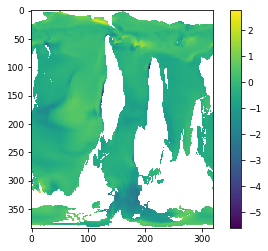

In [18]:
plt.imshow(Z[1]); plt.colorbar()

initial plot size (display units): 6.98,3.54
Adjusting fig size:
	(W,H in): 10.00,4.00 --> 8.03,6.73
new plot size: 5.61,3.57


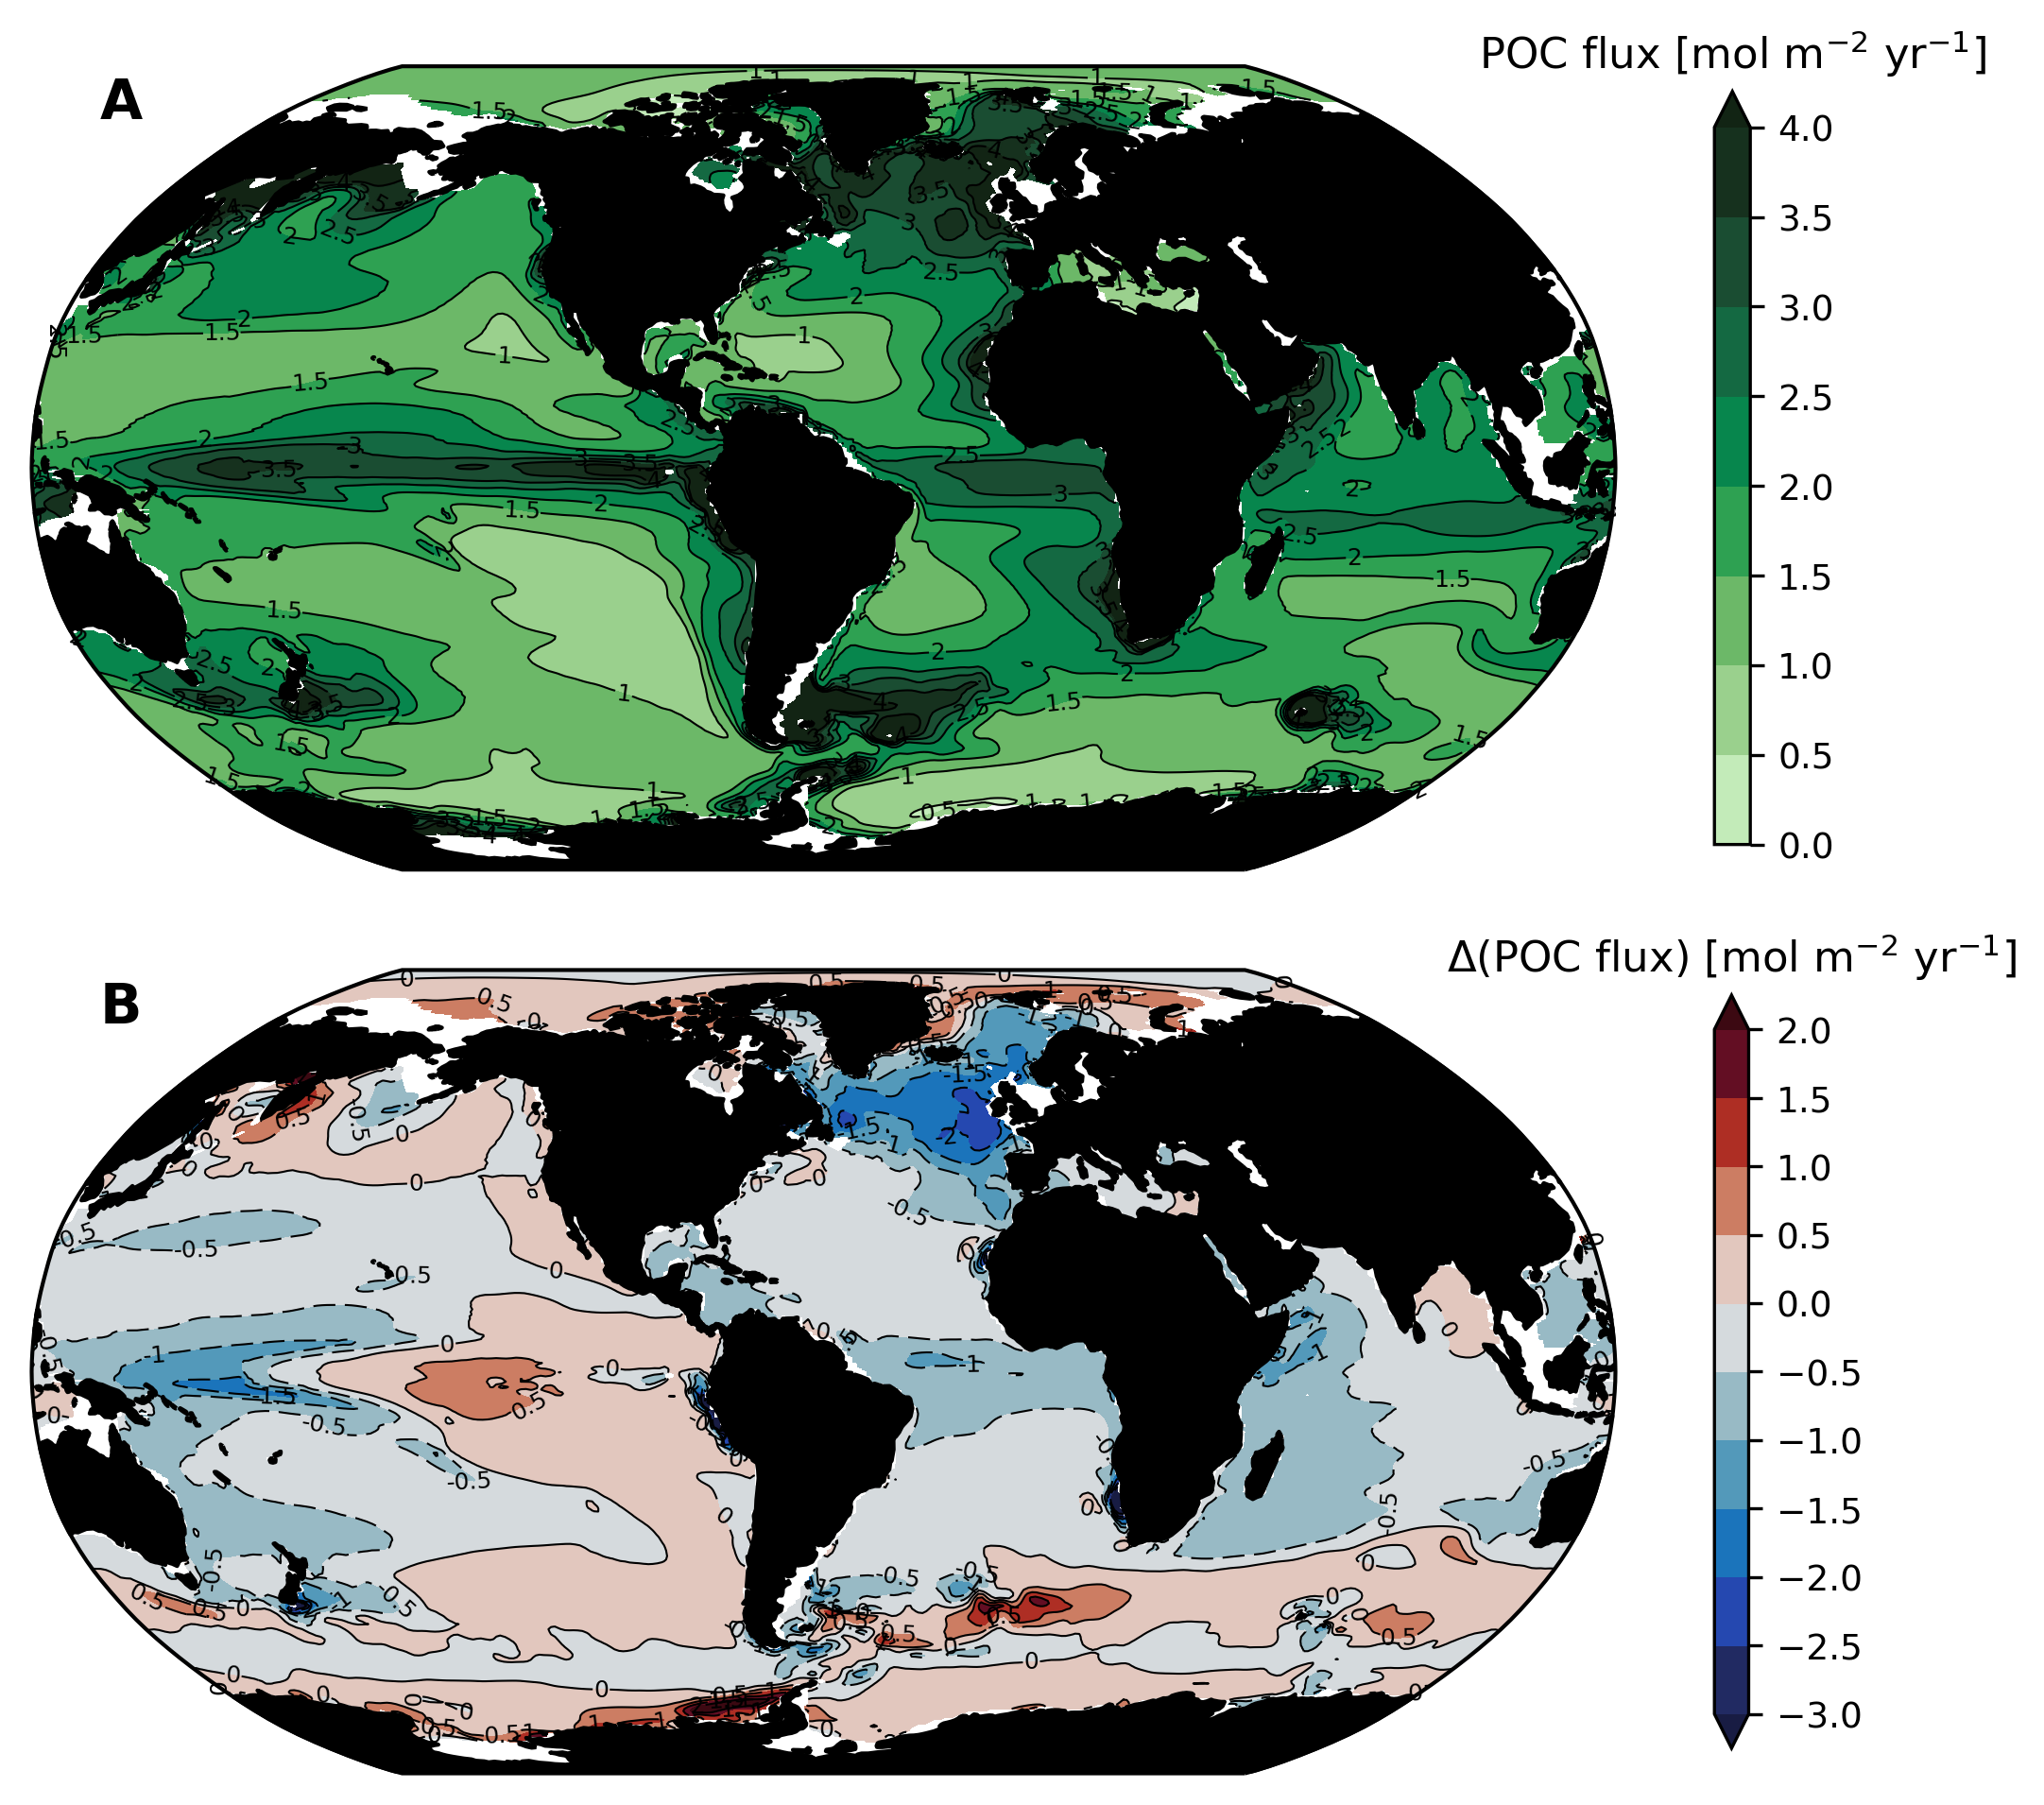

In [30]:
plot_name = os.path.join(diro['fig'],'cesm-export-production.pdf')

matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'

fig=plt.figure(figsize=(10, 4),dpi=300)
gs = gridspec.GridSpec(2,1)


obj = [[]]*2
ax = []
for i,(lon,lat,z) in enumerate(zip(LON,LAT,Z)):

    if i == 0:
        norm = plot_tools.MidPointNorm(midpoint=1)
        units = 'POC flux [mol m$^{-2}$ yr$^{-1}$]'
        contour_specs = {'levels':[0.,0.5,1.,1.5,2.,2.5,3.,3.5,4.],
                          'cmap':cmocean.cm.algae,
                          'extend':'max'}
    else:
        levels = np.arange(-3.,2.5,0.5)
        norm = plot_tools.MidPointNorm(midpoint=0)
        units = '$\Delta$(POC flux) [mol m$^{-2}$ yr$^{-1}$]'
        contour_specs = {'levels':levels,'cmap':cmocean.cm.balance,'norm':norm,'extend':'both'}
          
    obj[i] = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                                   contour_specs,
                                                   units = units,
                                                   fig=fig,
                                                   gridspec=gs,
                                                   row=i,col=0)
    ax.append(obj[i]['ax'])

gridspec_kwargs = {'hspace' : -0.1,
                   'wspace' : 0.05,
                   'left' : 0.,
                   'right' : 0.87,
                   'bottom' : 0.,
                   'top' : 1.}
fgsz = plot_tools.plotgrid(fig, gs, ax, [2,1],gridspec_kwargs)

alp = [chr(i).upper() for i in range(97,97+26)]
for i,axi in enumerate(ax):
    p = axi.get_position()
    y = p.y1-0.08
    fig.text(0.03,y,'%s'%alp[i],
             fontsize=14.,
             fontweight = 'semibold')
plt.savefig(plot_name,dpi=300,bbox_inches='tight')